In [1]:
from pathlib import Path
import os

import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import random

from bearfacedetection.xml_parser import load_xml

In [2]:
def filepath_to_image(filepath: Path):
    image = cv2.imread(str(filepath))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def to_boolean_mask(black_white_image):
    return np.all(black_white_image == [255, 255, 255], axis=2)

def load_image(image_data: dict):
    image_filepath = image_data["filepath"]
    image = cv2.imread(str(image_filepath))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def show_image(image):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.axis('on')
    plt.show()

In [3]:
base_path = Path('../../data/01_raw/BearID/')
label_path = base_path / 'images_train_without_bc.xml'
xml_data = load_xml(base_path=base_path, filepath=label_path)

In [4]:
xml_data["images"][0]

{'filepath': PosixPath('../../data/01_raw/BearID/images/brooksFalls/je_201708/bf_755/755-scare-d-bear-near-the-north-side-of-brooks-falls_9237775339_o.jpg'),
 'bboxes': [{'top': 1059,
   'left': 1172,
   'width': 200,
   'height': 200,
   'parts': {'htop': {'x': 1283, 'y': 1068},
    'lear': {'x': 1335, 'y': 1080},
    'rear': {'x': 1228, 'y': 1084},
    'nose': {'x': 1279, 'y': 1197},
    'leye': {'x': 1324, 'y': 1132},
    'reye': {'x': 1246, 'y': 1133}}}],
 'size': {'width': 2000, 'height': 1500}}

In [5]:
idx = 46
image_data = xml_data["images"][idx]
image_filepath = image_data["filepath"]
image = load_image(image_data)

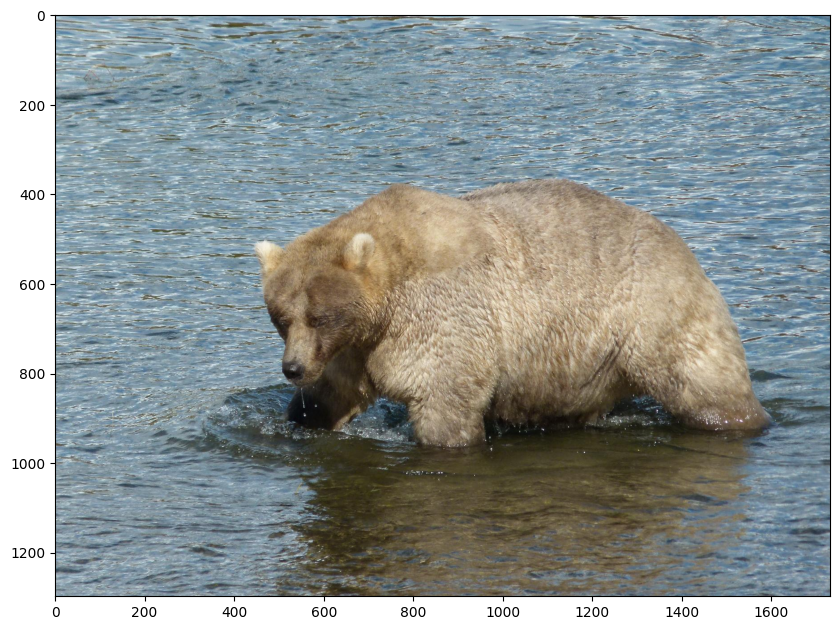

In [6]:
show_image(image)

In [7]:
masks_test_path = Path('../../data/04_feature/bearfacesegmentation/sam/full_bears/test')
masks_train_path = Path('../../data/04_feature/bearfacesegmentation/sam/full_bears/train')

In [8]:
masks_test_path.exists(), masks_train_path.exists()

(True, True)

In [9]:
masks_train_filepaths = [masks_train_path / filename for filename in os.listdir(masks_train_path)]
masks_test_filepaths = [masks_test_path / filename for filename in os.listdir(masks_test_path)]
masks_filepaths = [*masks_train_filepaths, *masks_test_filepaths]
filename_to_mask_filepath = {filepath.stem: filepath for filepath in masks_filepaths}

In [10]:
filename_to_mask_filepath.get("32-2-3")

PosixPath('../../data/04_feature/bearfacesegmentation/sam/full_bears/train/32-2-3.png')

In [11]:
mask_body_filepath = filename_to_mask_filepath.get(image_filepath.stem)
boolean_mask_body = to_boolean_mask(filepath_to_image(mask_body_filepath))

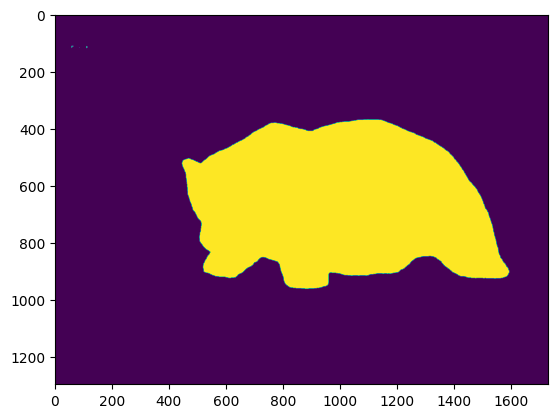

In [12]:
plt.imshow(boolean_mask_body)

In [13]:
boolean_mask_head = np.zeros(boolean_mask_body.shape,bool)
bbox = image_data["bboxes"][0]
# mask_head[y:y+h,x:x+w] = img[y:y+h,x:x+w]
boolean_mask_head[bbox["top"]:bbox["top"]+bbox["height"],bbox["left"]:bbox["left"]+bbox["width"]] = boolean_mask_body[bbox["top"]:bbox["top"]+bbox["height"],bbox["left"]:bbox["left"]+bbox["width"]]

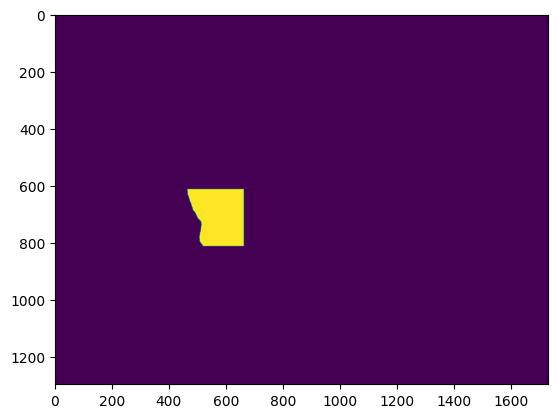

In [14]:
plt.imshow(boolean_mask_head)

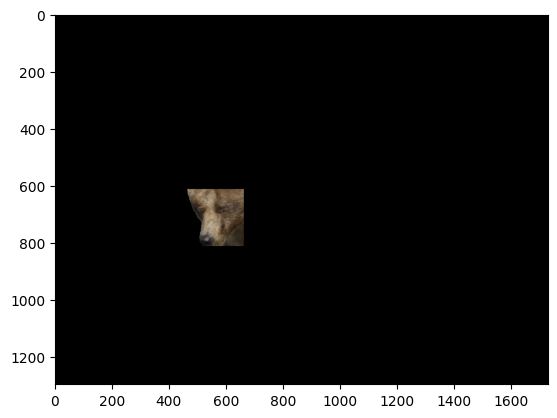

In [15]:
segmented_image = image.copy()
segmented_image[~boolean_mask_head] = [0,0,0]
plt.imshow(segmented_image)